#Hyperspectral Images(HSI) Analysis Simplified
This tutorial focuses on:
1. Introduction
2.  How to download HSI
3.  Reading hyperspectral image
4.  Visualizing the bands of the Hyperspectral image
5.  Visualizing ground truth of the image.
6.  Extracting pixels of the HSI
7.  Visualizing spectral signatures

#1. Introduction

In [ ]:
from IPython.display import HTML

In [ ]:
HTML('''<h5>See the below video which give a brief introduction on hyperspectral imaging.</h5><p>Credit- SPECIM</p></br>
        <center><iframe width="920" height="420"src="https://www.youtube-nocookie.com/embed/_sUZ96YZOQU" 
        frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" 
        allowfullscreen></iframe></center>''')

#2. How to download Hyperspectral image


*   The bench mark hyperspectral image datasets are available on the [Computational intelligence Group](https://www.ehu.eus/ccwintco/index.php?title=Hyperspectral_Remote_Sensing_Scenes)

*  Copy the download link address of hyperspectral image dataset and use wget command to download.

*  The entire tutorial uses Indian Pines HSI Dataset




In [1]:
!wget "http://www.ehu.eus/ccwintco/uploads/6/67/Indian_pines_corrected.mat"
!wget "http://www.ehu.eus/ccwintco/uploads/c/c4/Indian_pines_gt.mat"

--2022-07-26 22:28:42--  http://www.ehu.eus/ccwintco/uploads/6/67/Indian_pines_corrected.mat
Resolving www.ehu.eus (www.ehu.eus)... 158.227.0.65, 2001:720:1410::65
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.ehu.eus/ccwintco/uploads/6/67/Indian_pines_corrected.mat [following]
--2022-07-26 22:28:42--  https://www.ehu.eus/ccwintco/uploads/6/67/Indian_pines_corrected.mat
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5953527 (5.7M)
Saving to: ‘Indian_pines_corrected.mat’

Indian_pines_correc 100%[===================>]   5.68M  1.56MB/s    in 3.6s    

2022-07-26 22:28:46 (1.56 MB/s) - ‘Indian_pines_corrected.mat’ saved [5953527/5953527]

--2022-07-26 22:28:46--  http://www.ehu.eus/ccwintco/uploads/c/c4/Indian_pines_gt.mat
Resolving www.ehu.eus (www.ehu.eus)... 158.227.0.65, 2001:720:1410::65
Connectin

In [ ]:
!ls

drive  Indian_pines_corrected.mat  Indian_pines_gt.mat	sample_data


#Reading Hyperspectral Image

To read hyperspectral image, the scipy python package which is used to do scientific calculations.




In [2]:
## Importing Library.
from scipy.io import loadmat

In [3]:
## Read the data.
dataset = loadmat('Indian_pines_corrected.mat')['indian_pines_corrected']
ground_truth = loadmat('Indian_pines_gt.mat')['indian_pines_gt']

In [4]:

#The dimensions of the data.
print(f'Dataset: {dataset.shape}\nGround Truth: {ground_truth.shape}')

Dataset: (145, 145, 200)
Ground Truth: (145, 145)


#4. Visualizing the bands of the Hyperspectral image



*   The total number of the bands in the indian pines dataset is 200.
*   The below function plots the bands of the data.



In [5]:
import numpy as np
import matplotlib.pyplot as plt

def plot_band(dataset):
    plt.figure(figsize=(8, 6))
    band_no = np.random.randint(dataset.shape[2])
    plt.imshow(dataset[:,:, band_no], cmap='jet')
    plt.title(f'Band-{band_no}', fontsize=14)
    plt.axis('off')
    plt.colorbar()
    plt.show()
    

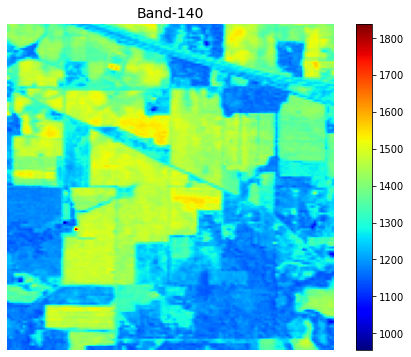

In [6]:
plot_band(dataset)

#5. Visualizing ground truth of the image.

 * The below code snippet plots the ground truth of the indian pines dataset.

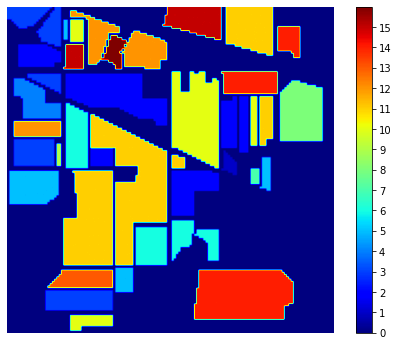

In [7]:
plt.figure(figsize=(8, 6))
plt.imshow(ground_truth, cmap='jet')
plt.axis('off')
plt.colorbar(ticks= range(0,16))
plt.show()

#6. Extracting pixels of the HSI
* The below function is used to extrac the pixels and class labels of the hyperspectral image.

In [8]:
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
from tqdm import tqdm
import pandas as pd
def extract_pixels(dataset, ground_truth):
    df = pd.DataFrame()
    for i in tqdm(range(dataset.shape[2])):
        df = pd.concat([df, pd.DataFrame(dataset[:, :, i].ravel())], axis=1)
    df = pd.concat([df, pd.DataFrame(ground_truth.ravel())], axis=1)
    df.columns = [f'band-{i}' for i in range(1, 1+dataset.shape[2])]+['class']
    return df

In [10]:
df = extract_pixels(dataset, ground_truth)

100%|██████████| 200/200 [00:01<00:00, 192.02it/s]


In [11]:
df.head()

,band-1,band-2,band-3,band-4,band-5,band-6,band-7,band-8,band-9,band-10,...,band-192,band-193,band-194,band-195,band-196,band-197,band-198,band-199,band-200,class
0,3172,4142,4506,4279,4782,5048,5213,5106,5053,4750,...,1094,1090,1112,1090,1062,1069,1057,1020,1020,3
1,2580,4266,4502,4426,4853,5249,5352,5353,5347,5065,...,1108,1104,1117,1091,1079,1085,1064,1029,1020,3
2,3687,4266,4421,4498,5019,5293,5438,5427,5383,5132,...,1111,1114,1114,1100,1065,1092,1061,1030,1016,3
3,2749,4258,4603,4493,4958,5234,5417,5355,5349,5096,...,1122,1108,1109,1109,1071,1088,1060,1030,1006,3
4,2746,4018,4675,4417,4886,5117,5215,5096,5098,4834,...,1110,1107,1112,1094,1072,1087,1052,1034,1019,3


#Saving the data to a csv file.

In [12]:
df.to_csv('Dataset.csv', index=False)

# 7. Visualizing spectral signatures
* The below function plots the spectral signature.

In [ ]:
def plot_signature(df):
    plt.figure(figsize=(12, 6))
    pixel_no = np.random.randint(df.shape[0])
    plt.plot(range(1, 201), df.iloc[pixel_no, :-1].values.tolist(), 'b--', label= f'Class - {df.iloc[pixel_no, -1]}')
    plt.legend()
    plt.title(f'Pixel({pixel_no}) signature', fontsize=14)
    plt.xlabel('Band Number', fontsize=14)
    plt.ylabel('Pixel Intensity', fontsize=14)
    plt.show()

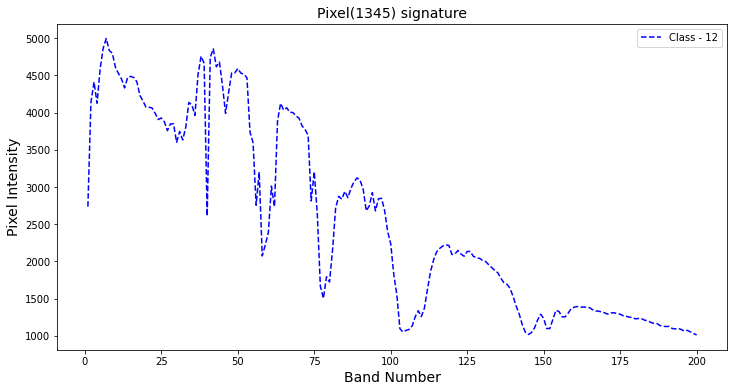

In [ ]:
plot_signature(df)

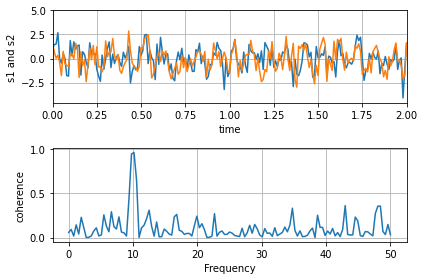

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

dt = 0.01
t = np.arange(0, 30, dt)
nse1 = np.random.randn(len(t))                 # white noise 1
nse2 = np.random.randn(len(t))                 # white noise 2

# Two signals with a coherent part at 10Hz and a random part
s1 = np.sin(2 * np.pi * 10 * t) + nse1
s2 = np.sin(2 * np.pi * 10 * t) + nse2

fig, axs = plt.subplots(2, 1)
axs[0].plot(t, s1, t, s2)
axs[0].set_xlim(0, 2)
axs[0].set_xlabel('time')
axs[0].set_ylabel('s1 and s2')
axs[0].grid(True)

cxy, f = axs[1].cohere(s1, s2, 256, 1. / dt)
axs[1].set_ylabel('coherence')

fig.tight_layout()
plt.show()

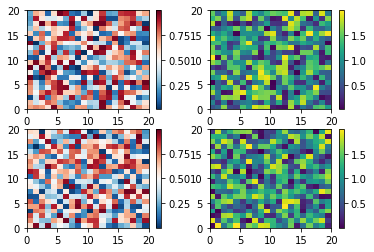

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Fixing random state for reproducibility
np.random.seed(19680801)

fig, axs = plt.subplots(2, 2)
cmaps = ['RdBu_r', 'viridis']
for col in range(2):
    for row in range(2):
        ax = axs[row, col]
        pcm = ax.pcolormesh(np.random.random((20, 20)) * (col + 1),
                            cmap=cmaps[col])
        fig.colorbar(pcm, ax=ax)
plt.show()

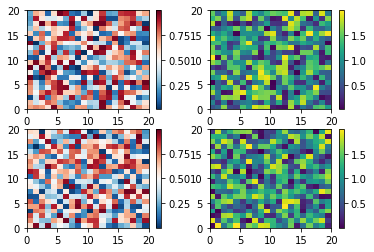

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

fig, axs = plt.subplots(2,2)
cmaps = ['RdBu_r', 'viridis']
for col in range(2):
    for row in range(2):
        ax = axs[row,col]
        pcm = ax.pcolormesh(np.random.random((20, 20)) * (col + 1),
                            cmap=cmaps[col])
        fig.colorbar(pcm, ax=ax)
plt.show()